In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import data
preCovid = pd.read_csv('/content/drive/MyDrive/covid_crime_micro_geo_11_29_2021.csv', index_col=0)
covid = pd.read_csv('/content/drive/MyDrive/precovid_crime_micro_geo_11_29_2021.csv', index_col=0)
print('Pre-Covid shape:',preCovid.shape)
print('Covid shape:',covid.shape)

Pre-Covid shape: (43164, 52)
Covid shape: (104359, 52)


### Prepare Pre-Covid Data

In [3]:
preCovid.columns

Index(['SHIFT', 'OFFENSE', 'WARD', 'LATITUDE', 'LONGITUDE', 'date',
       'total_cases', 'daily_cases', 'daily_death',
       'OUT_POSITIVE_QUARANTINE_PSMPD', 'MO', 'TU', 'WE', 'TH', 'FR', 'SA',
       'SU', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5',
       'ward_6', 'ward_7', 'ward_8', 'ARSON', 'ASSAULT W/DANGEROUS WEAPON',
       'BURGLARY', 'HOMICIDE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'SEX ABUSE',
       'THEFT F/AUTO', 'THEFT/OTHER', 'DAY', 'EVENING', 'MIDNIGHT',
       'distance_metro', 'distance_nightclubs', 'distance_worship'],
      dtype='object')

In [4]:
preCovid_o = preCovid.drop(columns=['SHIFT','WARD', 'date',
       'total_cases', 'daily_cases', 'daily_death',
       'OUT_POSITIVE_QUARANTINE_PSMPD', 'ARSON', 'ASSAULT W/DANGEROUS WEAPON',
       'BURGLARY', 'HOMICIDE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'SEX ABUSE',
       'THEFT F/AUTO', 'THEFT/OTHER'])

In [5]:
preCovid_o.columns

Index(['OFFENSE', 'LATITUDE', 'LONGITUDE', 'MO', 'TU', 'WE', 'TH', 'FR', 'SA',
       'SU', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5',
       'ward_6', 'ward_7', 'ward_8', 'DAY', 'EVENING', 'MIDNIGHT',
       'distance_metro', 'distance_nightclubs', 'distance_worship'],
      dtype='object')

In [6]:
preCovid_X = preCovid_o.drop('OFFENSE', axis=1).copy()
preCovid_y = preCovid_o['OFFENSE'].copy()

In [7]:
X_train_pre, X_test_pre, y_train_pre, y_test_pre = train_test_split(preCovid_X,preCovid_y,test_size=.3, random_state=0)

In [8]:
print(X_train_pre.shape)
print(y_train_pre.shape)
print(X_test_pre.shape)
print(y_test_pre.shape)

(30214, 35)
(30214,)
(12950, 35)
(12950,)


### Prepare Covid Data

In [9]:
covid.columns

Index(['SHIFT', 'OFFENSE', 'WARD', 'LATITUDE', 'LONGITUDE', 'date',
       'total_cases', 'daily_cases', 'daily_death',
       'OUT_POSITIVE_QUARANTINE_PSMPD', 'MO', 'TU', 'WE', 'TH', 'FR', 'SA',
       'SU', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5',
       'ward_6', 'ward_7', 'ward_8', 'ARSON', 'ASSAULT W/DANGEROUS WEAPON',
       'BURGLARY', 'HOMICIDE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'SEX ABUSE',
       'THEFT F/AUTO', 'THEFT/OTHER', 'DAY', 'EVENING', 'MIDNIGHT',
       'distance_metro', 'distance_nightclubs', 'distance_worship'],
      dtype='object')

In [10]:
covid_o = covid.drop(columns=['SHIFT', 'WARD', 'date',
       'ARSON', 'ASSAULT W/DANGEROUS WEAPON',
       'BURGLARY', 'HOMICIDE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'SEX ABUSE',
       'THEFT F/AUTO', 'THEFT/OTHER'])

In [11]:
covid_o.columns

Index(['OFFENSE', 'LATITUDE', 'LONGITUDE', 'total_cases', 'daily_cases',
       'daily_death', 'OUT_POSITIVE_QUARANTINE_PSMPD', 'MO', 'TU', 'WE', 'TH',
       'FR', 'SA', 'SU', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ward_1', 'ward_2', 'ward_3',
       'ward_4', 'ward_5', 'ward_6', 'ward_7', 'ward_8', 'DAY', 'EVENING',
       'MIDNIGHT', 'distance_metro', 'distance_nightclubs',
       'distance_worship'],
      dtype='object')

In [12]:
covid_X = covid_o.drop('OFFENSE', axis=1).copy()
covid_y = covid_o['OFFENSE'].copy()

In [13]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(covid_X,covid_y,test_size=.3, random_state=0)

In [14]:
print(X_train_c.shape)
print(y_train_c.shape)
print(X_test_c.shape)
print(y_test_c.shape)

(73051, 39)
(73051,)
(31308, 39)
(31308,)


## Pre-Covid Model Training on Offense

### Train Pre-Covid model with Pre-Covid data

In [15]:
# decision tree accuracy without pruning
clf_tree = DecisionTreeClassifier(random_state=0).fit(X_train_pre, y_train_pre)
y_pred = clf_tree.predict(X_test_pre)
p_p = accuracy_score(y_test_pre, y_pred)
print('The model training score is', clf_tree.score(X_train_pre, y_train_pre))
print('The model accuracy score is', p_p )

The model training score is 0.982491560203879
The model accuracy score is 0.38007722007722006


[Text(488.78636188665354, 403.453125, 'MIDNIGHT <= 0.5\ngini = 0.741\nsamples = 30214\nvalue = [9, 1856, 1427, 230, 3930, 2240, 183, 8904, 11435]\nclass = THEFT/OTHER'),
 Text(242.96424969859785, 394.95937499999997, 'distance_metro <= 0.062\ngini = 0.709\nsamples = 24382\nvalue = [8, 1101, 1008, 0, 3075, 1306, 142, 7794, 9948]\nclass = THEFT/OTHER'),
 Text(18.647048896054077, 386.465625, 'LONGITUDE <= -77.028\ngini = 0.562\nsamples = 1856\nvalue = [0, 54, 59, 0, 151, 78, 4, 347, 1163]\nclass = THEFT/OTHER'),
 Text(3.6352487003021423, 377.971875, 'distance_nightclubs <= 0.029\ngini = 0.451\nsamples = 835\nvalue = [0, 23, 35, 0, 42, 26, 0, 102, 607]\nclass = THEFT/OTHER'),
 Text(1.4716943883135505, 369.478125, 'SU <= 0.5\ngini = 0.702\nsamples = 55\nvalue = [0, 0, 9, 0, 4, 2, 0, 20, 20]\nclass = THEFT F/AUTO'),
 Text(1.2068762240447406, 360.984375, 'SEP <= 0.5\ngini = 0.662\nsamples = 45\nvalue = [0, 0, 4, 0, 3, 2, 0, 16, 20]\nclass = THEFT/OTHER'),
 Text(1.1374157219414462, 352.49062499

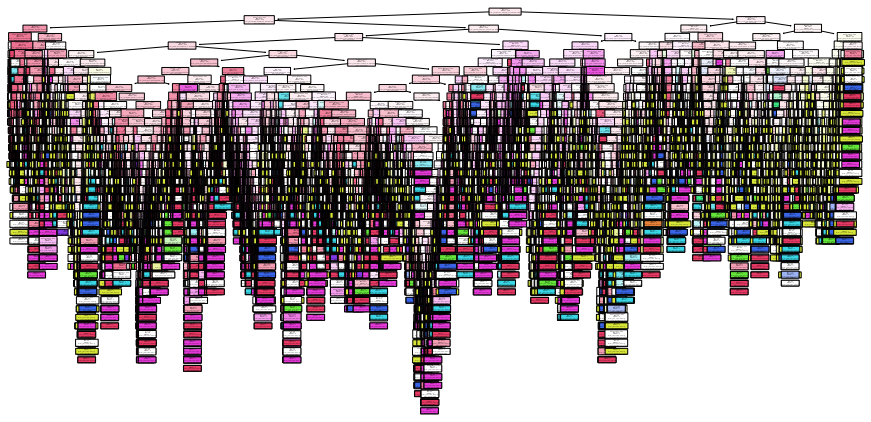

In [16]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_tree, filled=True,rounded=True, class_names=['ARSON', 'ASSAULT W/DANGEROUS WEAPON','BURGLARY', 
                                                           'HOMICIDE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 
                                                           'SEX ABUSE','THEFT F/AUTO', 'THEFT/OTHER'],
          feature_names=preCovid_X.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


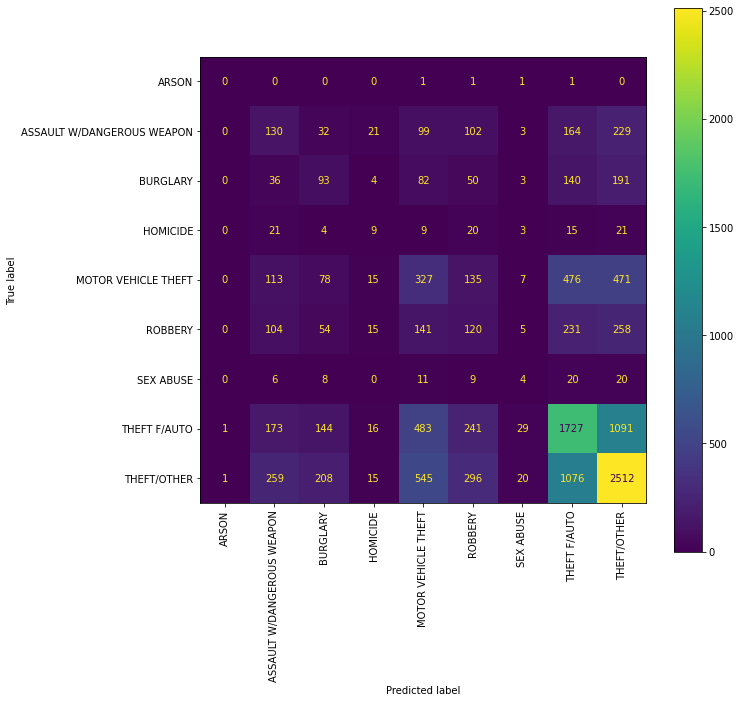

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf_tree,X_test_pre,y_test_pre,
                      display_labels=['ARSON', 'ASSAULT W/DANGEROUS WEAPON','BURGLARY', 
                                      'HOMICIDE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 
                                      'SEX ABUSE','THEFT F/AUTO', 'THEFT/OTHER'],
                      ax=ax, xticks_rotation='vertical')

In [18]:
# define alphas and impurities to prune tree
path = clf_tree.cost_complexity_pruning_path(X_train_pre, y_train_pre)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

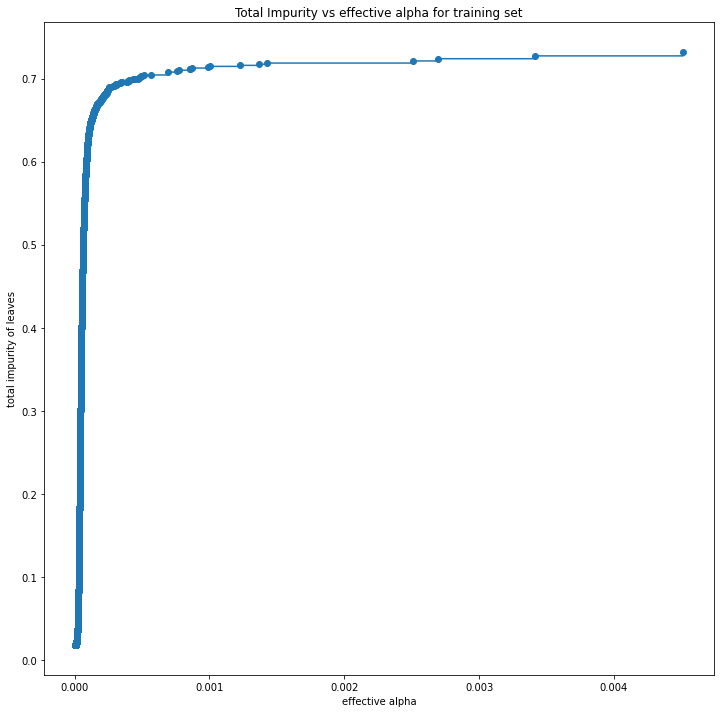

In [19]:
# plot the total impurity vs alpha
fig, ax = plt.subplots(figsize=(12,12))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [20]:
clf_dt_pruned = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0008)
clf_dt_pruned = clf_dt_pruned.fit(X_train_pre, y_train_pre)

In [21]:
y_pred_pre = clf_dt_pruned.predict(X_test_pre)
pruned_p_p = accuracy_score(y_test_pre, y_pred)
print("The model accuracy score is" , pruned_p_p)

The model accuracy score is 0.38007722007722006


[Text(599.85, 385.05, 'MIDNIGHT <= 0.5\ngini = 0.741\nsamples = 30214\nvalue = [9, 1856, 1427, 230, 3930, 2240, 183, 8904, 11435]\nclass = THEFT/OTHER'),
 Text(488.25, 339.75, 'distance_metro <= 0.062\ngini = 0.709\nsamples = 24382\nvalue = [8, 1101, 1008, 0, 3075, 1306, 142, 7794, 9948]\nclass = THEFT/OTHER'),
 Text(432.45, 294.45, 'gini = 0.562\nsamples = 1856\nvalue = [0, 54, 59, 0, 151, 78, 4, 347, 1163]\nclass = THEFT/OTHER'),
 Text(544.05, 294.45, 'LONGITUDE <= -76.98\ngini = 0.715\nsamples = 22526\nvalue = [8, 1047, 949, 0, 2924, 1228, 138, 7447, 8785]\nclass = THEFT/OTHER'),
 Text(362.7, 249.15, 'LATITUDE <= 38.941\ngini = 0.695\nsamples = 18026\nvalue = [5, 646, 760, 0, 2143, 861, 92, 5959, 7560]\nclass = THEFT/OTHER'),
 Text(167.39999999999998, 203.85, 'LATITUDE <= 38.869\ngini = 0.692\nsamples = 15302\nvalue = [5, 587, 663, 0, 1784, 738, 72, 4743, 6710]\nclass = THEFT/OTHER'),
 Text(111.6, 158.55, 'gini = 0.803\nsamples = 1341\nvalue = [1, 195, 64, 0, 232, 159, 12, 300, 378]

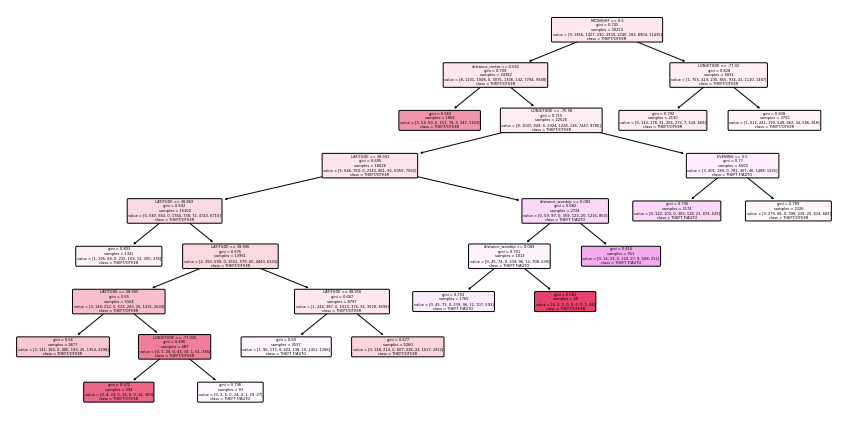

In [22]:
# plot the pruned decision tree
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,filled=True, rounded=True, 
          class_names=['ARSON', 'ASSAULT W/DANGEROUS WEAPON','BURGLARY', 
                       'HOMICIDE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 
                       'SEX ABUSE','THEFT F/AUTO', 'THEFT/OTHER'], 
       feature_names=X_train_pre.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


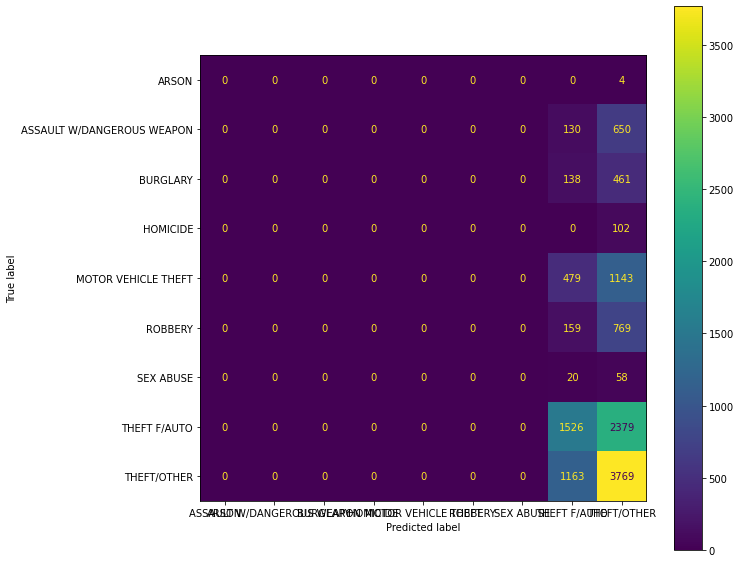

In [23]:
# plot the pruned confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf_dt_pruned, X_test_pre, y_test_pre, 
                      display_labels=['ARSON', 'ASSAULT W/DANGEROUS WEAPON','BURGLARY', 
                                      'HOMICIDE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 
                                      'SEX ABUSE','THEFT F/AUTO', 'THEFT/OTHER'], ax=ax)

In [24]:
#gather all alphas for comparison ----- this is the step that does not run fully. 
#clfs = []
#for ccp_alpha in ccp_alphas:
#    clf_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
#    clf_tree.fit(X_train_pre, y_train_pre)
#    clfs.append(clf_tree)

In [25]:
#accuracy vs alpha ------ Need the step above to run in order to run this
#train_scores_pre = [clf_tree.score(X_train, y_train) for clf in clfs]
#test_scores_pre = [clf_tree.score(X_test, y_test) for clf in clfs]

#fig, ax = plt.subplots()
#ax.set_xlabel("alpha")
#ax.set_ylabel("accuracy")
#ax.set_title("Accuracy vs alpha for training and testing sets")
#ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
#ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
#ax.legend()
#plt.show()

### Test Pre-Covid Model with Covid Data

In [26]:
covid_test = covid.drop(columns=['SHIFT','WARD', 'date','total_cases', 'daily_cases', 
                                 'daily_death', 'OUT_POSITIVE_QUARANTINE_PSMPD', 'ARSON', 
                                 'ASSAULT W/DANGEROUS WEAPON', 'BURGLARY', 'HOMICIDE', 
                                 'MOTOR VEHICLE THEFT', 'ROBBERY', 'SEX ABUSE','THEFT F/AUTO', 'THEFT/OTHER'])

In [27]:
covid_X_test = covid_test.drop('OFFENSE', axis=1).copy()
covid_y_test = covid_test['OFFENSE'].copy()

In [28]:
X_train_ct, X_test_ct, y_train_ct, y_test_ct = train_test_split(covid_X_test,covid_y_test,test_size=.3, random_state=0)

In [29]:
y_pred_ct1 = clf_tree.predict(X_test_ct)
p_c = accuracy_score(y_test_ct, y_pred_ct1)
print('The not pruned model accuracy score is', p_c)

The not pruned model accuracy score is 0.3714386099399514


In [30]:
y_pred_ct2 = clf_dt_pruned.predict(X_test_ct)
pruned_p_c = accuracy_score(y_test_ct, y_pred_ct2)
print('The pruned model accuracy score is', pruned_p_c)

The pruned model accuracy score is 0.4613517311869171


## Covid Model Training on Ward

In [31]:
# decision tree accuracy without pruning
clf_tree_c = DecisionTreeClassifier(random_state=0).fit(X_train_c, y_train_c)
y_pred_c = clf_tree_c.predict(X_test_c)
c_c = accuracy_score(y_test_c, y_pred_c)
print('The model training score is', clf_tree_c.score(X_train_c, y_train_c))
print('The model accuracy score is', c_c)

The model training score is 0.9707601538651079
The model accuracy score is 0.46409863293726844


[Text(230.42251301776568, 403.623, 'distance_metro <= 0.062\ngini = 0.688\nsamples = 73051\nvalue = [11, 3657, 3026, 329, 5062, 4598, 582, 23584, 32202]\nclass = THEFT/OTHER'),
 Text(28.589550886242478, 395.469, 'LONGITUDE <= -77.028\ngini = 0.504\nsamples = 6707\nvalue = [0, 187, 129, 6, 208, 341, 23, 1291, 4522]\nclass = THEFT/OTHER'),
 Text(15.29314786669615, 387.315, 'MIDNIGHT <= 0.5\ngini = 0.372\nsamples = 3342\nvalue = [0, 82, 51, 0, 63, 115, 13, 406, 2612]\nclass = THEFT/OTHER'),
 Text(9.786838554710876, 379.161, 'distance_metro <= 0.029\ngini = 0.313\nsamples = 2825\nvalue = [0, 52, 41, 0, 45, 79, 8, 278, 2322]\nclass = THEFT/OTHER'),
 Text(4.289099546536552, 371.007, 'LONGITUDE <= -77.033\ngini = 0.227\nsamples = 1491\nvalue = [0, 21, 15, 0, 21, 36, 1, 90, 1307]\nclass = THEFT/OTHER'),
 Text(2.2222560226974286, 362.853, 'distance_nightclubs <= 0.037\ngini = 0.219\nsamples = 1481\nvalue = [0, 20, 15, 0, 21, 35, 1, 84, 1305]\nclass = THEFT/OTHER'),
 Text(1.1976364085178859, 354

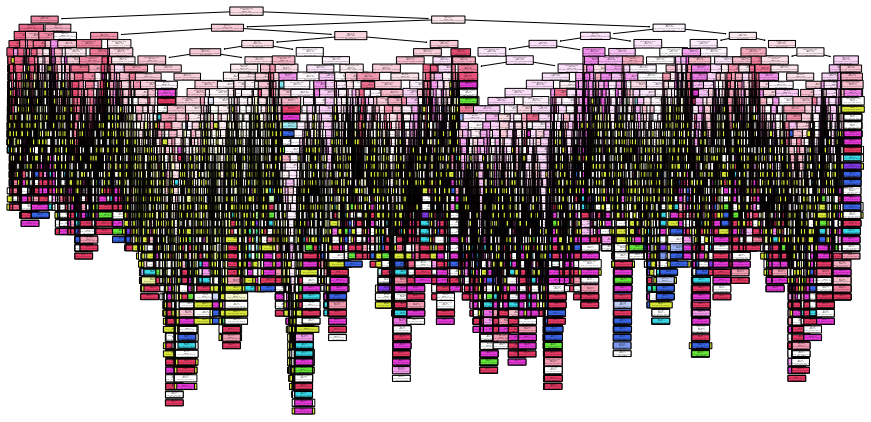

In [32]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_tree_c, filled=True,rounded=True, class_names=['ARSON', 'ASSAULT W/DANGEROUS WEAPON','BURGLARY', 
                                      'HOMICIDE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 
                                      'SEX ABUSE','THEFT F/AUTO', 'THEFT/OTHER']
          ,feature_names=covid_X.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


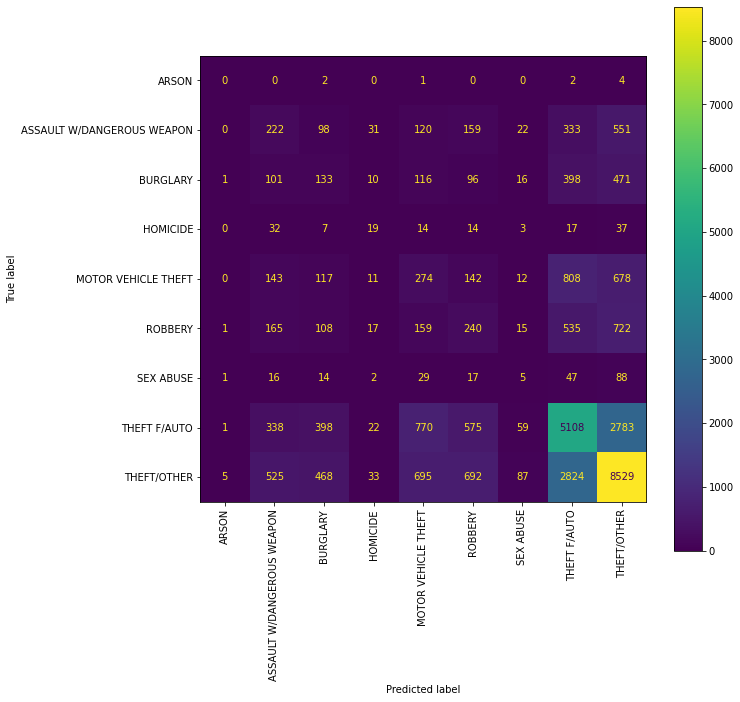

In [33]:
fig_c, ax_c = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf_tree_c,X_test_c,y_test_c,
                      display_labels=['ARSON', 'ASSAULT W/DANGEROUS WEAPON','BURGLARY', 
                                      'HOMICIDE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 
                                      'SEX ABUSE','THEFT F/AUTO', 'THEFT/OTHER'],
                      ax=ax_c, xticks_rotation='vertical')

In [34]:
# define alphas and impurities to prune tree
path_c = clf_tree_c.cost_complexity_pruning_path(X_train_c, y_train_c)
ccp_alphas_c, impurities_c = path_c.ccp_alphas, path_c.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

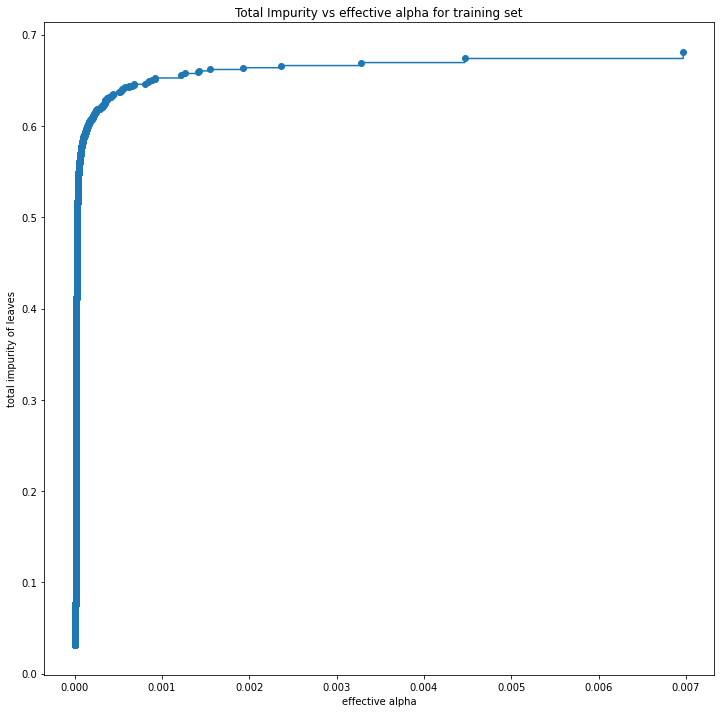

In [35]:
fig, ax = plt.subplots(figsize=(12,12))
ax.plot(ccp_alphas_c[:-1], impurities_c[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [36]:
pruned_c = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0013)
pruned_c = pruned_c.fit(X_train_c, y_train_c)
y_pred_c = pruned_c.predict(X_test_c)
pruned_c_c = accuracy_score(y_test_c, y_pred_c)
print("The model accuracy score is" , pruned_c_c)

The model accuracy score is 0.47154082023763894


[Text(334.79999999999995, 373.72499999999997, 'distance_metro <= 0.062\ngini = 0.688\nsamples = 73051\nvalue = [11, 3657, 3026, 329, 5062, 4598, 582, 23584, 32202]\nclass = THEFT/OTHER'),
 Text(111.6, 305.775, 'LONGITUDE <= -77.028\ngini = 0.504\nsamples = 6707\nvalue = [0, 187, 129, 6, 208, 341, 23, 1291, 4522]\nclass = THEFT/OTHER'),
 Text(55.8, 237.825, 'gini = 0.372\nsamples = 3342\nvalue = [0, 82, 51, 0, 63, 115, 13, 406, 2612]\nclass = THEFT/OTHER'),
 Text(167.39999999999998, 237.825, 'LATITUDE <= 38.909\ngini = 0.601\nsamples = 3365\nvalue = [0, 105, 78, 6, 145, 226, 10, 885, 1910]\nclass = THEFT/OTHER'),
 Text(111.6, 169.87499999999997, 'gini = 0.509\nsamples = 2108\nvalue = [0, 63, 36, 3, 74, 131, 6, 377, 1418]\nclass = THEFT/OTHER'),
 Text(223.2, 169.87499999999997, 'gini = 0.672\nsamples = 1257\nvalue = [0, 42, 42, 3, 71, 95, 4, 508, 492]\nclass = THEFT F/AUTO'),
 Text(558.0, 305.775, 'LATITUDE <= 38.906\ngini = 0.699\nsamples = 66344\nvalue = [11, 3470, 2897, 323, 4854, 425

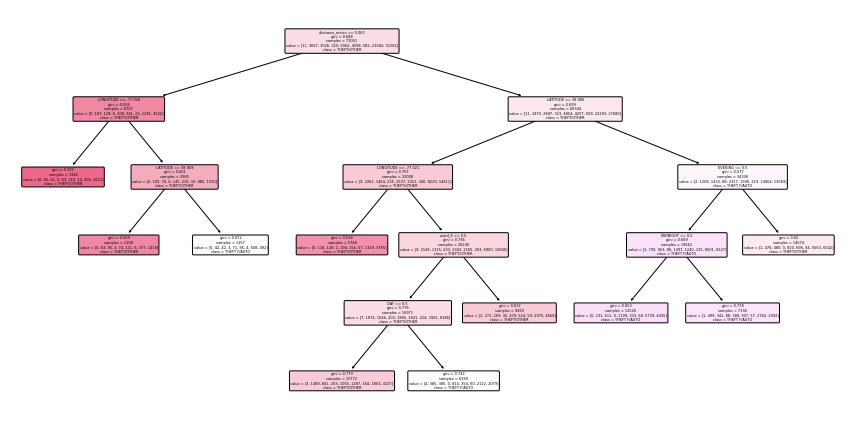

In [37]:
plt.figure(figsize=(15,7.5))
plot_tree(pruned_c,filled=True, rounded=True, 
          class_names=['ARSON', 'ASSAULT W/DANGEROUS WEAPON','BURGLARY', 
                       'HOMICIDE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 
                       'SEX ABUSE','THEFT F/AUTO', 'THEFT/OTHER'], 
       feature_names=X_train_c.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


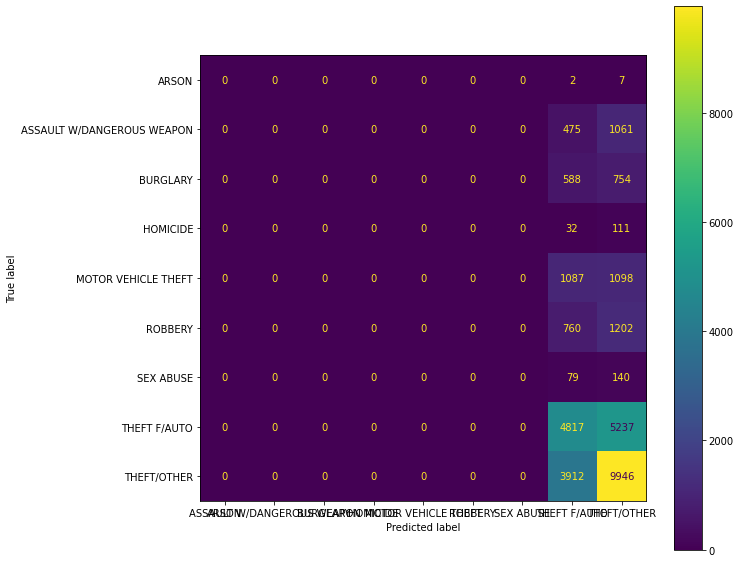

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(pruned_c, X_test_c, y_test_c, 
                      display_labels=['ARSON', 'ASSAULT W/DANGEROUS WEAPON','BURGLARY', 
                       'HOMICIDE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 
                       'SEX ABUSE','THEFT F/AUTO', 'THEFT/OTHER'], ax=ax)

### Test Covid Model with Pre-Covid data

In [39]:
preCovid_test = preCovid.drop(columns=['SHIFT', 'WARD', 'date',
       'ARSON', 'ASSAULT W/DANGEROUS WEAPON',
       'BURGLARY', 'HOMICIDE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'SEX ABUSE',
       'THEFT F/AUTO', 'THEFT/OTHER'])

In [40]:
preCovid_X_test = preCovid_test.drop('OFFENSE', axis=1).copy()
preCovid_y_test = preCovid_test['OFFENSE'].copy()

In [41]:
X_train_pret, X_test_pret, y_train_pret, y_test_pret = train_test_split(preCovid_X_test,preCovid_y_test,test_size=.3, random_state=0)

In [42]:
y_pred_pret1 = clf_tree_c.predict(X_test_pret)
c_p = accuracy_score(y_test_pret, y_pred_pret1)
print('The not pruned model accuracy score is', c_p)

The not pruned model accuracy score is 0.36633204633204636


In [43]:
y_pred_pret2 = pruned_c.predict(X_test_pret)
pruned_c_p = accuracy_score(y_test_pret, y_pred_pret2)
print('The pruned model accuracy score is', pruned_c_p)

The pruned model accuracy score is 0.39861003861003863


## Results

In [44]:
print('DC Crime Analysis by Offense \n')
print('Pre-Covid Model - Not Pruned')
print('------------------------')
print(f'Accuracy with Pre-Covid Data: {p_p}')
print(f'Accuracy with Covid Data: {p_c} \n')
print('Pre-Covid Model - Pruned')
print('------------------------')
print(f'Accuracy with Pre-Covid Data: {pruned_p_p}')
print(f'Accuracy with Covid Data: {pruned_p_c} \n')
print('Covid Model - Not Pruned')
print('------------------------')
print(f'Accuracy with Pre-Covid Data: {c_c}')
print(f'Accuracy with Covid Data: {c_p} \n')
print('Covid Model - Pruned')
print('------------------------')
print(f'Accuracy with Pre-Covid Data: {pruned_c_p}')
print(f'Accuracy with Covid Data: {pruned_c_c}')

DC Crime Analysis by Offense 

Pre-Covid Model - Not Pruned
------------------------
Accuracy with Pre-Covid Data: 0.38007722007722006
Accuracy with Covid Data: 0.3714386099399514 

Pre-Covid Model - Pruned
------------------------
Accuracy with Pre-Covid Data: 0.38007722007722006
Accuracy with Covid Data: 0.4613517311869171 

Covid Model - Not Pruned
------------------------
Accuracy with Pre-Covid Data: 0.46409863293726844
Accuracy with Covid Data: 0.36633204633204636 

Covid Model - Pruned
------------------------
Accuracy with Pre-Covid Data: 0.39861003861003863
Accuracy with Covid Data: 0.47154082023763894
